# Importing Library:

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# total no of rows and columns
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 10683
No of Columns: 11


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']}

Some feature with date and time related columns are mention with object datatype. We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.

##### Converting Date and time columns 

In [8]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


### Feature engineering operation

##### 1. Feature Engineering on Date of Journey Columns

In [11]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month
df.drop("Date_of_Journey",axis=1,inplace=True)

##### 2. Feature Engineering on 'Duration' Column

In [12]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['Duration']=pd.to_numeric(df['Duration'])

##### 3. Feature Engineering on 'Dep_Time' Column

In [13]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop("Dep_Time",axis=1,inplace=True)

##### 4. Feature Engineering on 'Arrival_Time' Column

In [14]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'], object: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']}

In [17]:
# Spliting data into categorical and Numerical Variable
Numerical = ['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']

Categorical = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [22]:
# Unique value counts of ',i, 'Enlisted as Below Table :
for i in Categorical:
    print(df[i].value_counts())
    print("-"*60)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
------------------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
------------------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
------------------------------------------------------------
DEL → BOM → COK          2376
BLR

"New Delhi" is mention as "Delhi". 

No info is mention as 'No Info' few times.

Very Few Premium economy or Business class flight in dataset. 

In [23]:
# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

# In the column "Additional Info", "No Info" and "No info" are same so replacing it by "No Info
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

In [24]:
 # This will check the duplicate data 
df.duplicated().sum()  

222

In [25]:
# Droping the duplicates
df.drop_duplicates(keep='last',inplace= True)

In [26]:
df.shape

(10461, 14)

### Missing value check

In [28]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Route                         1        0.009559
Total_Stops                   1        0.009559
Airline                       0        0.000000
Source                        0        0.000000
Destination                   0        0.000000
Duration                      0        0.000000
Additional_Info               0        0.000000
Price                         0        0.000000
Journey_Day                   0        0.000000
Journey_Month                 0        0.000000
Dep_Hour                      0        0.000000
Dep_Min                       0        0.000000
Arrival_Hour                  0        0.000000
Arrival_Min                   0        0.000000


Missing values are present in Total Stops and Route.

In [29]:
# Checking the mode of Categorical columns "Route" 
print("The mode of Route is:",df["Route"].mode())

# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Checking the mode of Categorical columns "Total_Stops"
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


### Missing value check¶

<AxesSubplot:>

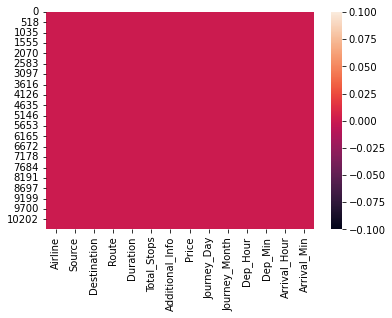

In [30]:
# checking the null values with heatmap
sns.heatmap(df.isnull())

No Missing Value and duplicate entry is Present.

### Statistical Matrix

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10461.0,629.945034,500.742197,5.0,170.0,505.0,910.0,2860.0
Price,10461.0,9027.212504,4624.861032,1759.0,5224.0,8266.0,12346.0,79512.0
Journey_Day,10461.0,12.629194,8.791165,3.0,5.0,6.0,21.0,27.0
Journey_Month,10461.0,5.535130,2.995285,1.0,3.0,5.0,6.0,12.0
Dep_Hour,10461.0,12.476341,5.726072,0.0,8.0,11.0,18.0,23.0
Dep_Min,10461.0,24.408278,18.817167,0.0,5.0,25.0,40.0,55.0
Arrival_Hour,10461.0,13.389638,6.853854,0.0,8.0,14.0,19.0,23.0
Arrival_Min,10461.0,24.723258,16.569495,0.0,10.0,25.0,35.0,55.0


In [38]:
df[Categorical].describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10461,10461,10461,10461,10461,10461
unique,12,5,5,128,5,9
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info
freq,3700,4346,4346,2377,5626,8184


The Minimum flight ticket price is Rs.1759 and Maximum flight ticket price is Rs.79512.

Presense of outliers in Duration & Price columns as we see huge difference in 75% and max.

High value of std. deviation indicating spread of data.

There are 12 airline in dataset with maximum flight run by Jet Airways.

The data of 128 route in dataset and we find maximum flight on route DEL → BOM → COK.

# Exploratory Data Analysis

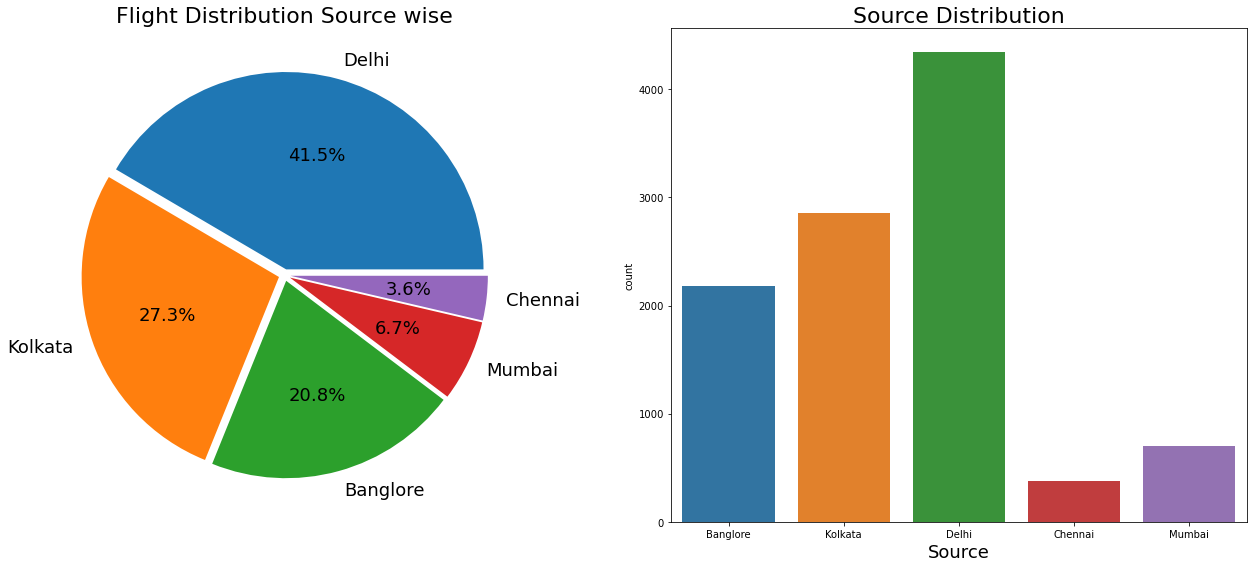

In [46]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',fontsize =18, ax=ax[0])
ax[0].set_title('Flight Distribution Source wise', fontsize=22)
ax[0].set_ylabel('')
sns.countplot('Source',data=df,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22)
ax[1].set_xlabel("Source",fontsize=18)
plt.show()

Maximum flight depart from Delhi followed by Kolkata.

####  Source With respect to Target Variable

<Figure size 864x504 with 0 Axes>

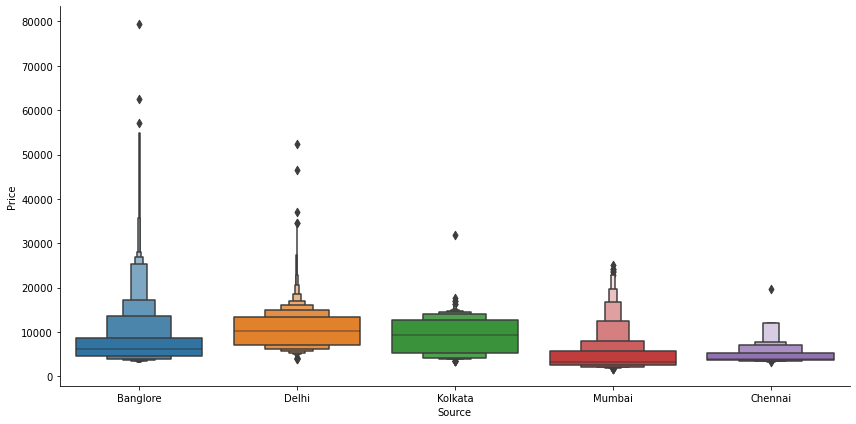

In [47]:
# Source vs Average Price
plt.figure(figsize=(12,7))
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=2)
plt.show()

 Maximum Fare Comes for Banglore flight.

### Destination VS Price

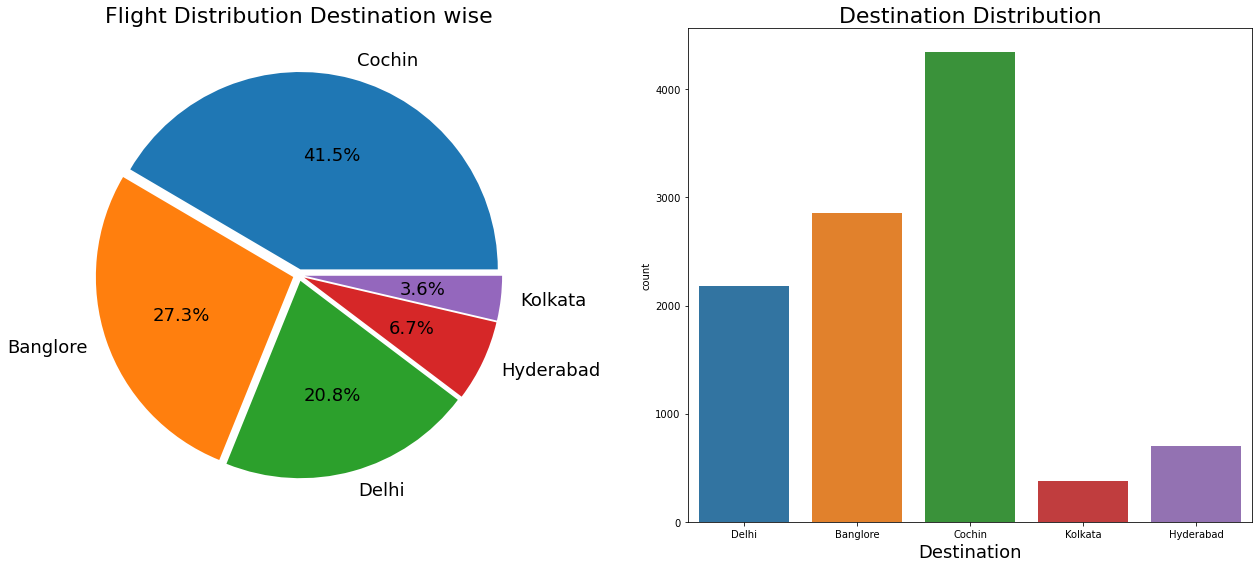

In [49]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Destination'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',fontsize = 18, ax=ax[0])
ax[0].set_title('Flight Distribution Destination wise', fontsize=22)
ax[0].set_ylabel('')
sns.countplot('Destination',data=df,ax=ax[1])
ax[1].set_title('Destination Distribution',fontsize=22)
ax[1].set_xlabel("Destination",fontsize=18)
plt.show()

Maximum 41.5% Flight lands into cochin followed by Banglore.

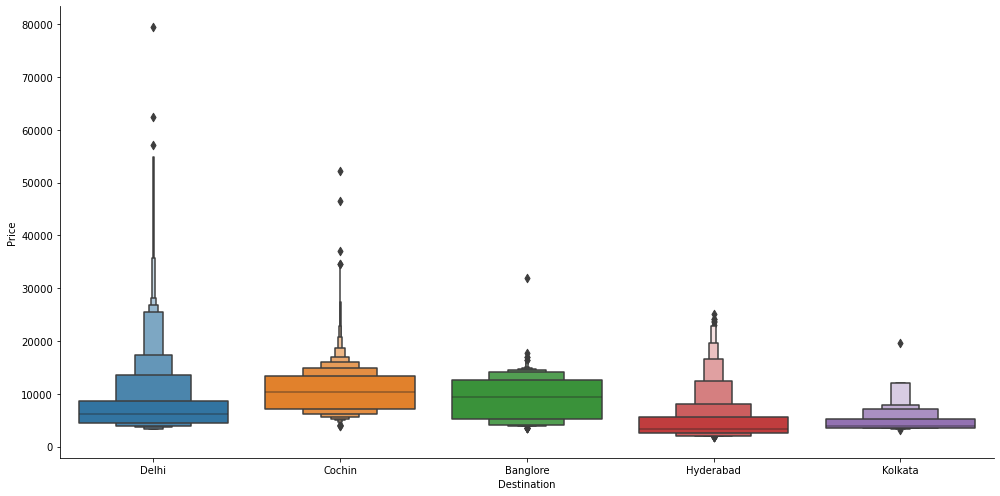

In [50]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),
            kind = "boxen",height = 7, aspect = 2 )
plt.show()

The Flight ticket price range in Delhi is the maximum, reason may be traffic & the National Capital

### Airlines VS Source

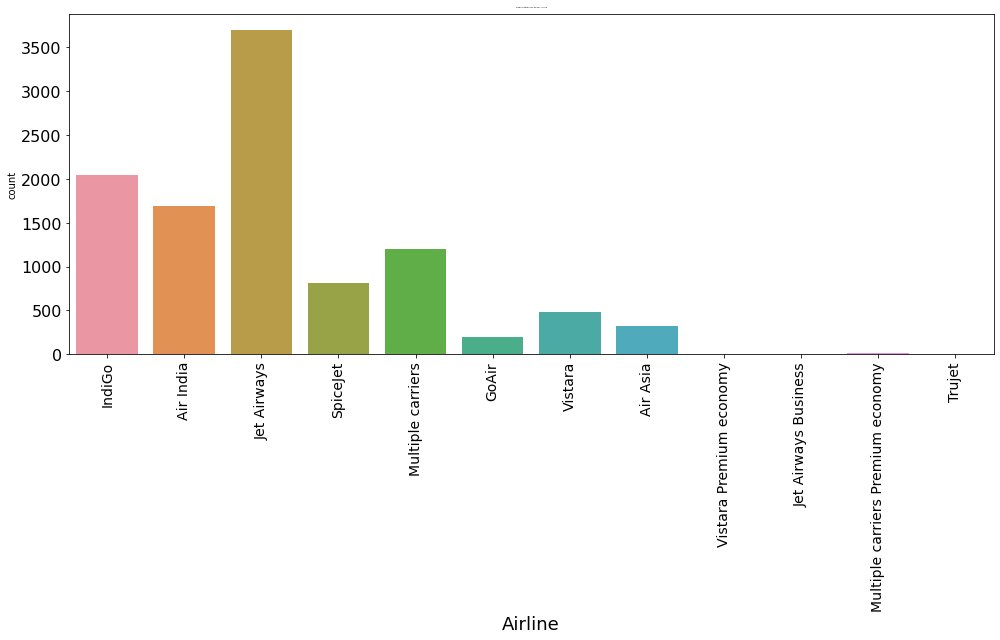

In [58]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Airline'])
plt.title('Flight distribution as per Airline', fontsize=2)
plt.xlabel('Airline', fontsize=18)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=16)
plt.show()

jet airways Airline runs highest number of flights out of all flights.




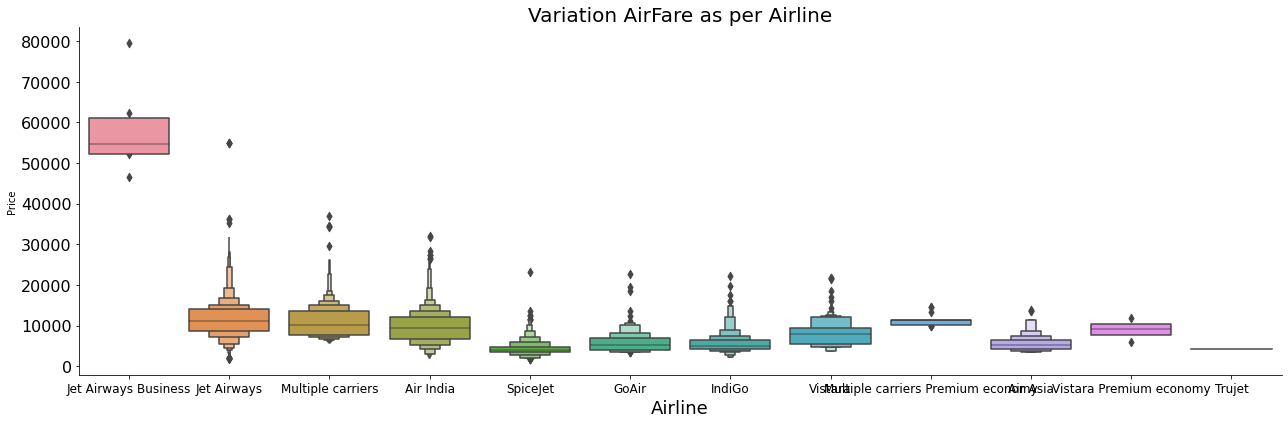

In [60]:
# Airline vs AveragePrice
plt.rcParams["figure.autolayout"] = True
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.title("Variation AirFare as per Airline",fontsize=20)
plt.xlabel('Airline', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Jet airways and Air India are always highly priced due to various amenities they provide.

Low-cost carriers like indigo and spicejet have a lower and similar fare range

### Duration VS Price

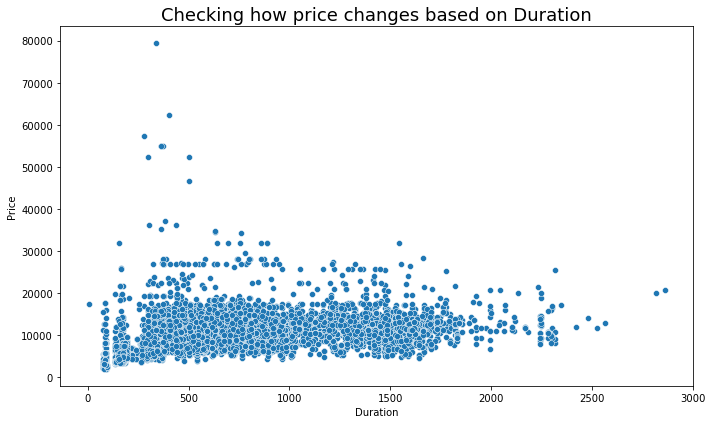

In [62]:
#duration v/s AveragePrice
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration', y='Price')
plt.title("Checking how price changes based on Duration",fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Duration plays a major role in affecting air ticket prices but  no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight

### Total Stops VS Price

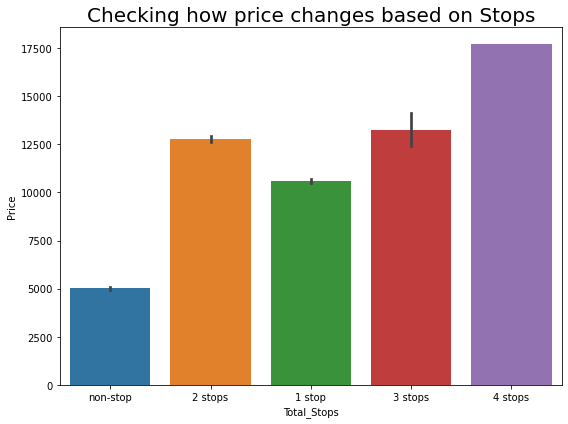

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df)
plt.title("Checking how price changes based on Stops",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least.

As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

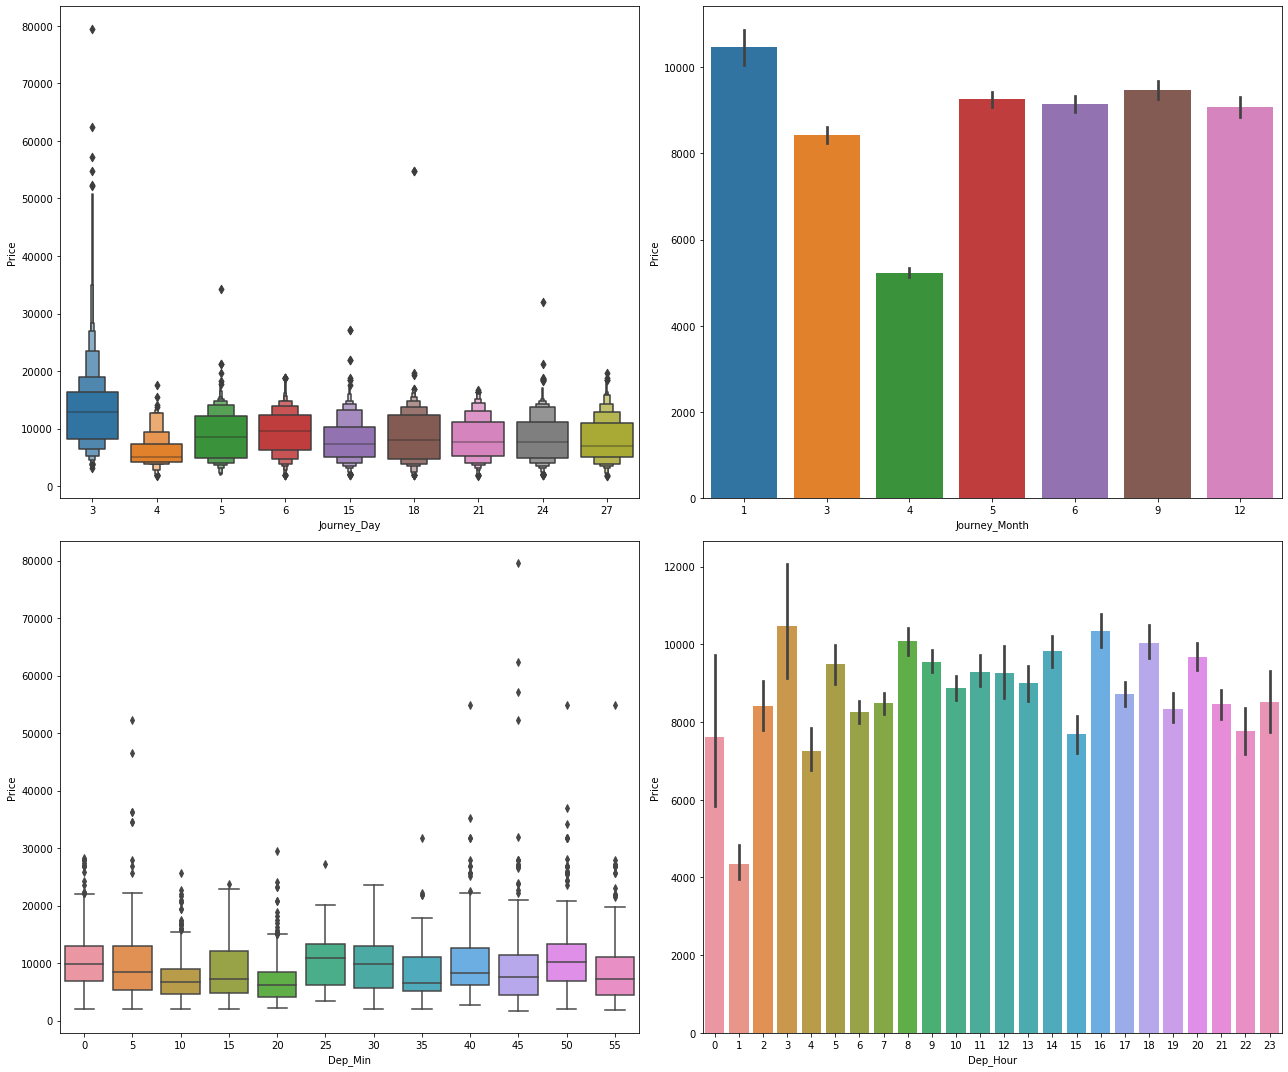

In [65]:
fig, axes = plt.subplots(2,2,figsize=(18,15))

# Checking relation between Journey_Day and Price
sns.boxenplot(x='Journey_Day',y='Price',ax = axes[0,0],data=df)

# Checking relation between Journey_Mionth and Price
sns.barplot(x='Journey_Month',y='Price',ax = axes[0,1],data=df)

# Checking relation between Dep_Min and Price
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df)

# Checking relation between Dep_Hour and Price
sns.barplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=df)
plt.show()

Airfare is high on Day 3 followed by Day 18.

January month are most expensive than others while airfare least expensive in April month.

# Encoding categorical data

In [66]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,170,4,6,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,6,7662,5,1,5,50,13,15
2,4,2,1,118,1140,1,6,13882,6,9,9,25,4,25
3,3,3,0,91,325,0,6,6218,5,12,18,5,23,30
4,3,0,2,29,285,0,6,13302,3,1,16,50,21,35


# Feature selection and Engineering

### 1. Outliers Detection and Removal

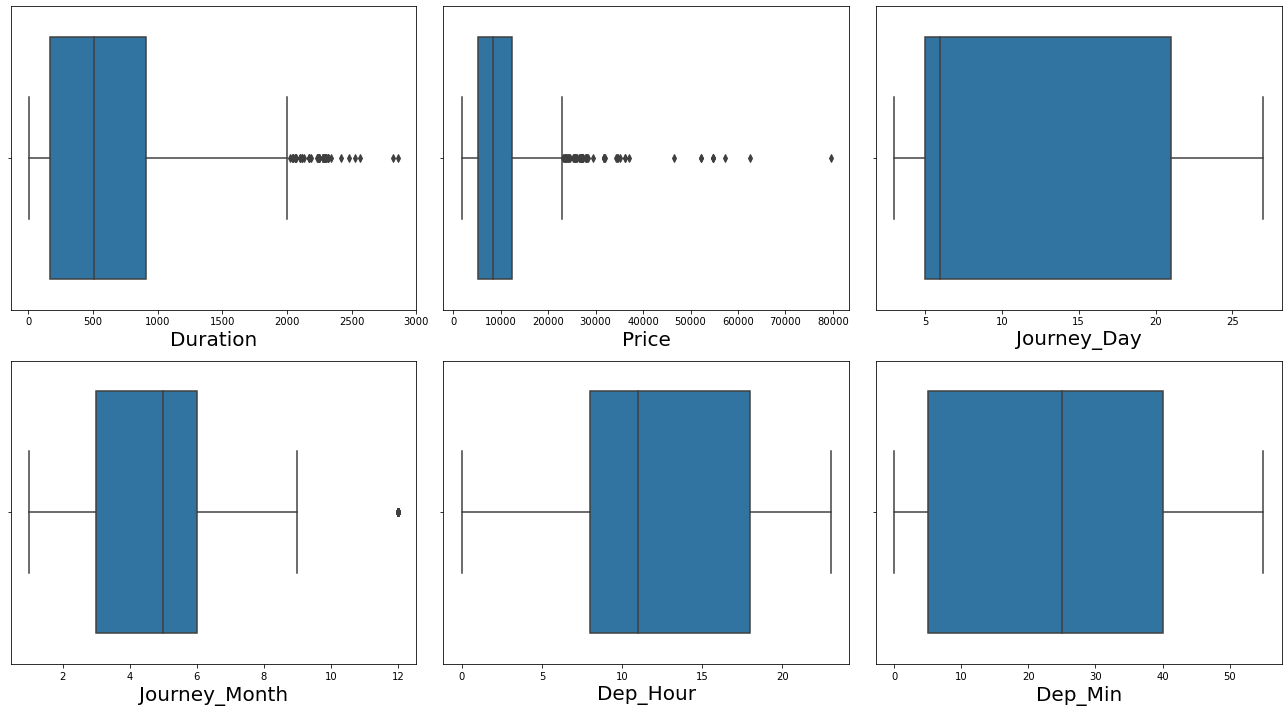

In [68]:
plt.figure(figsize=(18,10))
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Outliers removal using Zscore method

In [69]:
def threhold(z,d):
    for i in np.arange(3,4,0.01):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,2),np.round(loss,2))) 

In [70]:
#Using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

With threshold 3.0 data loss is 1.64%
With threshold 3.01 data loss is 1.63%
With threshold 3.02 data loss is 1.63%
With threshold 3.03 data loss is 1.62%
With threshold 3.04 data loss is 1.62%
With threshold 3.05 data loss is 1.62%
With threshold 3.06 data loss is 1.61%
With threshold 3.07 data loss is 1.61%
With threshold 3.08 data loss is 1.56%
With threshold 3.09 data loss is 1.56%
With threshold 3.1 data loss is 1.56%
With threshold 3.11 data loss is 1.55%
With threshold 3.12 data loss is 1.55%
With threshold 3.13 data loss is 1.55%
With threshold 3.14 data loss is 1.53%
With threshold 3.15 data loss is 1.52%
With threshold 3.16 data loss is 1.52%
With threshold 3.17 data loss is 1.51%
With threshold 3.18 data loss is 1.51%
With threshold 3.19 data loss is 1.51%
With threshold 3.2 data loss is 1.5%
With threshold 3.21 data loss is 1.49%
With threshold 3.22 data loss is 1.41%
With threshold 3.23 data loss is 1.34%
With threshold 3.24 data loss is 1.34%
With threshold 3.25 data loss

In [71]:
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (10461, 14)
Shape of the dataframe after removing outliers:  (10289, 14)
Percentage of data loss post outlier removal:  1.6442022751171015


### 2. Skewness of features

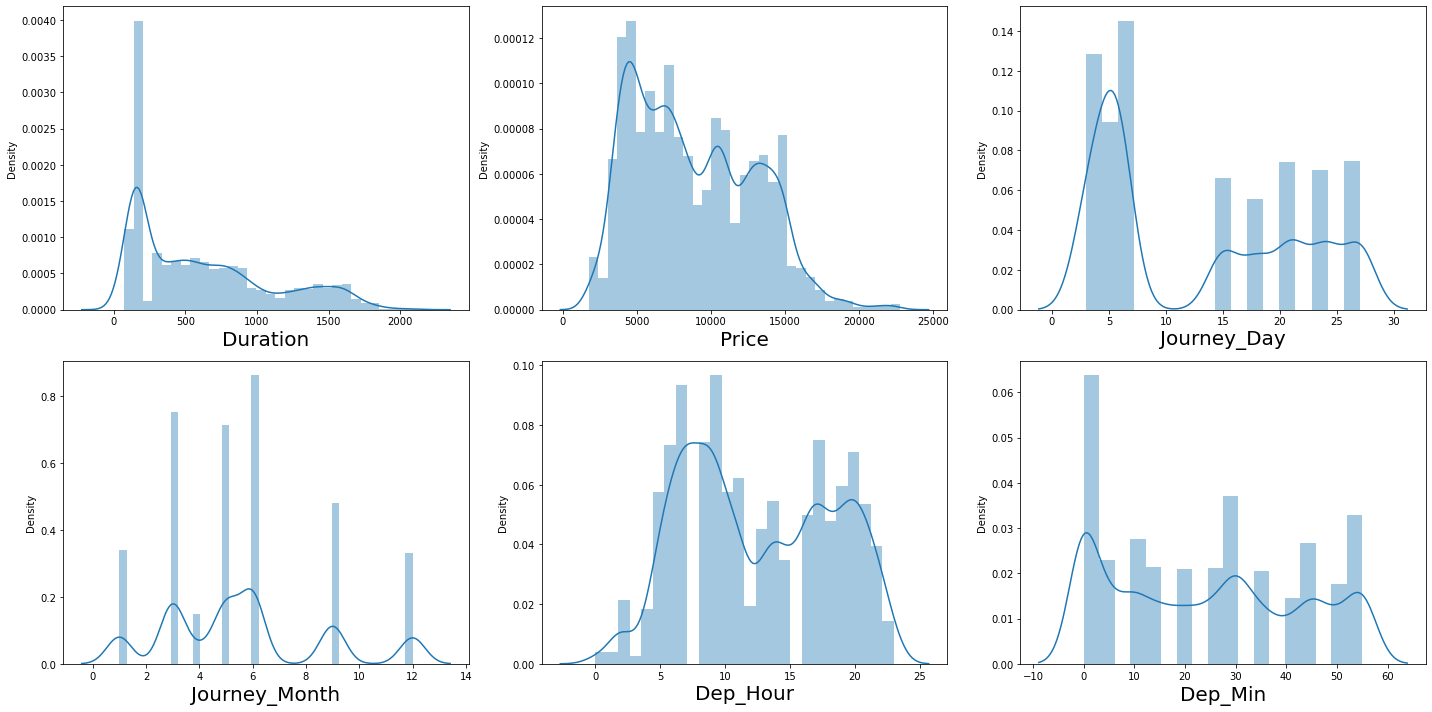

In [72]:
plt.figure(figsize=(20,10))
plotnum=1
for col in Numerical:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

In [73]:
df.skew()

Airline            0.721810
Source            -0.436014
Destination        0.850689
Route             -0.487883
Duration           0.820318
Total_Stops        0.599846
Additional_Info   -0.726010
Price              0.442553
Journey_Day        0.361840
Journey_Month      0.636388
Dep_Hour           0.099829
Dep_Min            0.176249
Arrival_Hour      -0.371973
Arrival_Min        0.107114
dtype: float64

Price and duration are continous numerical data with skewed nature. Out of which Price is target variable, so ingore it.

In [75]:
df['Duration'] = np.log1p(df['Duration'])

In [76]:
df['Duration'].skew()

-0.14885157403409577

### 3. Corrleation

In [77]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.015504,0.071028,0.029372,-0.115570,0.034367,0.100328,-0.037164,0.030017,-0.012245,-0.039750,-0.063211,0.001202,-0.075916
Source,-0.015504,1.000000,-0.430431,0.390544,0.128243,-0.235253,-0.035504,0.077542,-0.005684,0.041855,0.061320,-0.049390,0.028036,0.020829
Destination,0.071028,-0.430431,1.000000,-0.219421,-0.519574,0.517818,0.132394,-0.334660,0.016181,-0.061807,-0.090543,0.094539,-0.062342,0.006426
Route,0.029372,0.390544,-0.219421,1.000000,0.368942,-0.454621,-0.004211,0.245817,0.081385,0.019817,-0.072813,-0.062484,0.020383,-0.179203
Duration,-0.115570,0.128243,-0.519574,0.368942,1.000000,-0.817248,-0.277367,0.672463,-0.044900,0.080802,-0.004032,-0.038597,0.067942,-0.127676
Total_Stops,0.034367,-0.235253,0.517818,-0.454621,-0.817248,1.000000,0.263522,-0.626234,0.038820,-0.065168,0.038382,0.053461,-0.100318,0.178777
Additional_Info,0.100328,-0.035504,0.132394,-0.004211,-0.277367,0.263522,1.000000,-0.155222,-0.006106,-0.041823,-0.063337,0.028095,-0.025678,0.044119
Price,-0.037164,0.077542,-0.334660,0.245817,0.672463,-0.626234,-0.155222,1.000000,-0.146315,0.072558,0.011200,-0.055109,0.042929,-0.102230
Journey_Day,0.030017,-0.005684,0.016181,0.081385,-0.044900,0.038820,-0.006106,-0.146315,1.000000,-0.282914,-0.009465,-0.010120,-0.001491,-0.019360
Journey_Month,-0.012245,0.041855,-0.061807,0.019817,0.080802,-0.065168,-0.041823,0.072558,-0.282914,1.000000,0.027182,0.009782,-0.002404,-0.023438


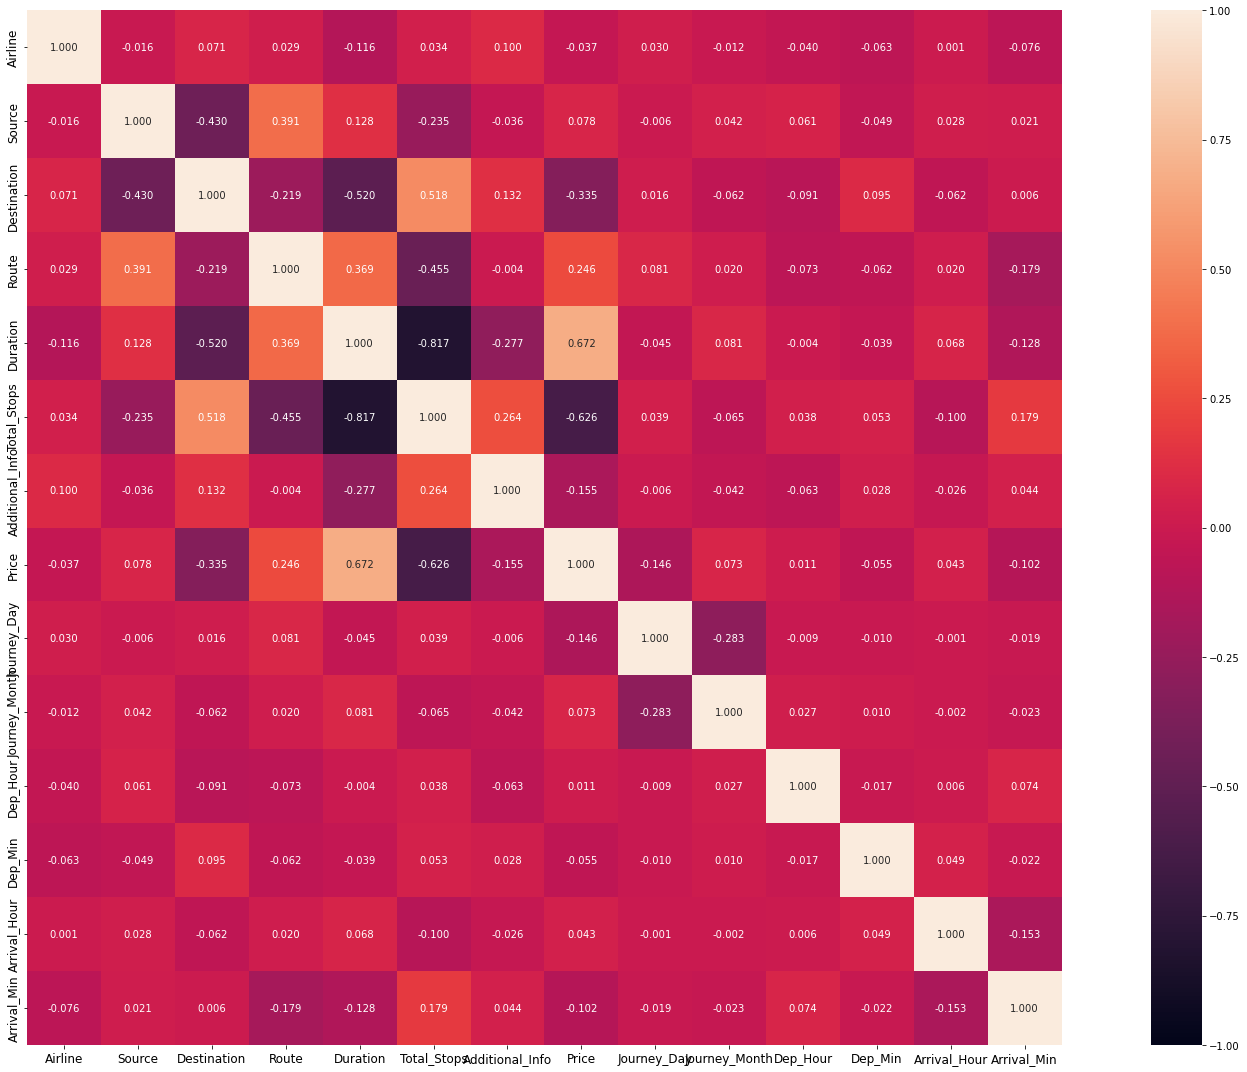

In [78]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10},)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

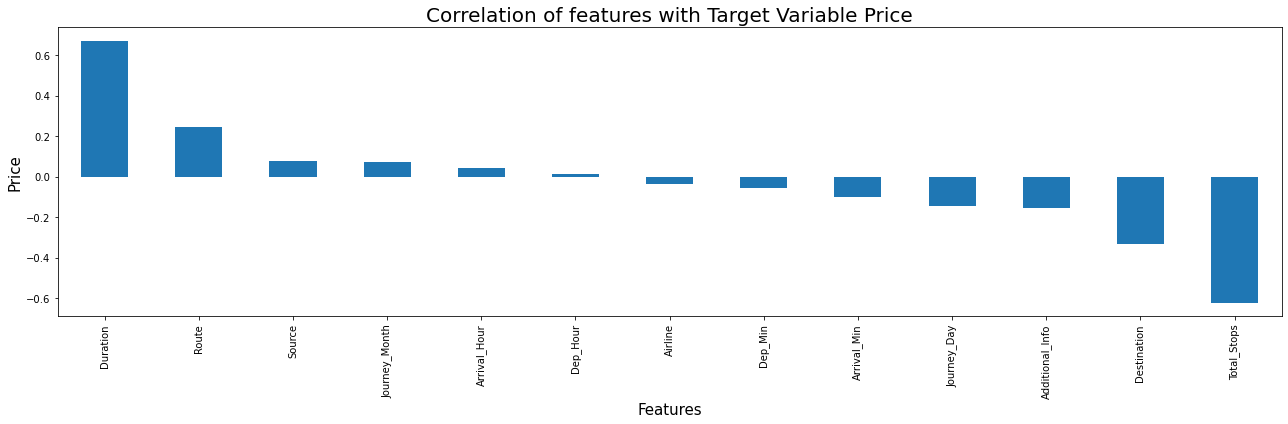

In [80]:
plt.figure(figsize = (18,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Correlation of features with Target Variable Price',fontsize = 20)
plt.show()

Total stops and duration are correlated with Target varible with correlation coeffient of 0.6 & more.



# Standard Scaling

In [81]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis =1)
Y = df['Price']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.046279,Airline
1,1.506367,Source
2,1.789798,Destination
3,1.555181,Route
4,3.420045,Duration
5,3.558776,Total_Stops
6,1.126826,Additional_Info
7,1.106882,Journey_Day
8,1.096836,Journey_Month
9,1.033988,Dep_Hour


# Machine Learning Model Building

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Best Random state

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.2)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5419032179928409 on Random_state 304


#### Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=304, test_size=.2)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print(' Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print(' R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2197.74455145158
Mean squared error : 7830471.227332524
Root Mean Squared Error: 2798.2979161148164


 R2 Score :
0.5419032179928409


### RandomForestRegressor

In [91]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
y_pred = rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print(' R2 Score :')
print(r2_score(Y_test,y_pred)) 

Mean absolute error : 577.759269021781
Mean squared error : 1121650.469411028
Root Mean Squared Error: 1059.0800108636874


 R2 Score :
0.9343814113280322


### DecisionTreeRegressor

In [92]:
dr = DecisionTreeRegressor()
dr.fit(X_train,Y_train)
dr.score(X_train,Y_train)
y_pred = dr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print(' R2 Score :')
print(r2_score(Y_test,y_pred)) 

Mean absolute error : 662.057013281503
Mean squared error : 1999564.4102418744
Root Mean Squared Error: 1414.0595497509553


 R2 Score :
0.883021852050163


### AdaBoostRegressor

In [93]:
ad = AdaBoostRegressor()
ad.fit(X_train,Y_train)
ad.score(X_train,Y_train)
y_pred = ad.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print(' R2 Score :')
print(r2_score(Y_test,y_pred)) 

Mean absolute error : 2184.3347837952933
Mean squared error : 6659884.934274243
Root Mean Squared Error: 2580.6752864849623


 R2 Score :
0.6103846411848345


### GradientBoostingRegressor

In [94]:
gb = GradientBoostingRegressor()
gb.fit(X_train,Y_train)
gb.score(X_train,Y_train)
y_pred = gb.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print(' R2 Score :')
print(r2_score(Y_test,y_pred)) 

Mean absolute error : 1129.6355194825062
Mean squared error : 2440568.3857332943
Root Mean Squared Error: 1562.2318604270283


 R2 Score :
0.8572223188982095


In [98]:
# Cross Validation
from sklearn.model_selection import cross_val_score
model = [rf,dr,ad,gb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score :',m)
    print("Mean CV Score :",score.mean())
    print('*'*50)



Cross Validation Score : RandomForestRegressor()
Mean CV Score : 0.920638632699586
**************************************************


Cross Validation Score : DecisionTreeRegressor()
Mean CV Score : 0.8703719678690552
**************************************************


Cross Validation Score : AdaBoostRegressor()
Mean CV Score : 0.609339358380067
**************************************************


Cross Validation Score : GradientBoostingRegressor()
Mean CV Score : 0.8414138366351022
**************************************************


RandomForestRegressor gives maximum R2 Score of 0.9343 with crossvalidation score 0.9206.

# Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [101]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [102]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose=10)
GCV.fit(X_train,Y_train)  

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=10)

In [113]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 80}

In [114]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split =5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 656.3072640773079
Mean squared error : 1228586.3537343114
Root Mean Squared Error: 1108.416146460485


 R2 Score of Final Model :
0.9281254679668467




 True Values Vs Predicted Value plot :


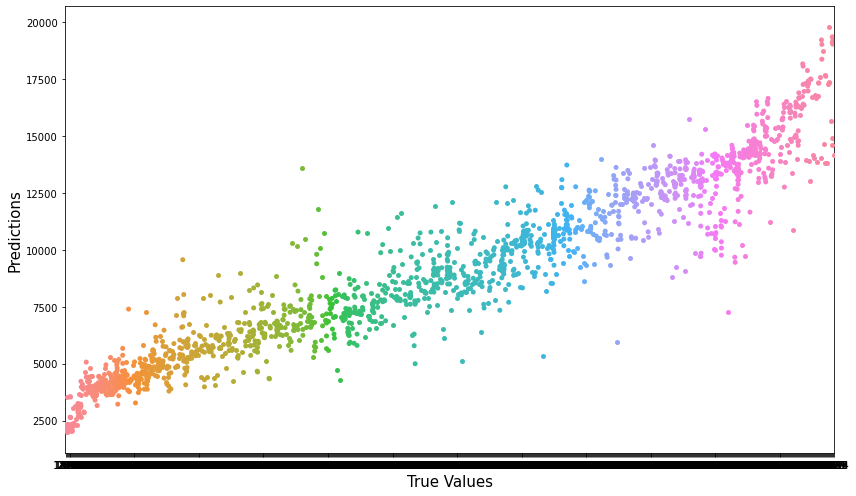

In [115]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print(' True Values Vs Predicted Value plot :')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [117]:
# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(rf.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

,Actual Values,Predicted Values
0,5054,5806.120000
1,2071,2741.980000
2,6723,6920.410000
3,19225,18548.520000
4,11269,8863.760000
...,...,...
2053,7240,9009.855000
2054,4823,4810.310000
2055,10231,10589.296667
2056,1759,2574.470000


# ML Model for Test Dataset

In [121]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [122]:
# total no of rows and columns
print('No of Rows:',test_df.shape[0])
print('No of Columns:',test_df.shape[1])

No of Rows: 2671
No of Columns: 10


### Feature Engineering Test Dataset

In [123]:
# Converting Date and Time columns from object type to Date type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

#### 1. Feature Engineering on Date of Journey Columns

In [124]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month
test_df.drop("Date_of_Journey",axis=1,inplace=True)

#### 2. Feature Engineering on 'Duration' Column

In [125]:
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration']=pd.to_numeric(test_df['Duration'])

#### 3. Feature Engineering on 'Dep_Time' Column

In [126]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute
test_df.drop("Dep_Time",axis=1,inplace=True)

#### 4. Feature Engineering on 'Arrival_Time' Column

In [127]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [128]:
# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

In [129]:
# This will check the duplicate data for all columns.
test_df.duplicated().sum() 

26

In [131]:
test_df.drop_duplicates(keep='last',inplace= True)

In [132]:
test_df.shape

(2645, 13)

#### Checking Missing Value

In [134]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                 Missing Values  % Missing data
Airline                       0             0.0
Source                        0             0.0
Destination                   0             0.0
Route                         0             0.0
Duration                      0             0.0
Total_Stops                   0             0.0
Additional_Info               0             0.0
Price                         0             0.0
Journey_Day                   0             0.0
Journey_Month                 0             0.0
Dep_Hour                      0             0.0
Dep_Min                       0             0.0
Arrival_Hour                  0             0.0
Arrival_Min                   0             0.0


In [135]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    test_df[i] = le.fit_transform(test_df[i])
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,655,0,4,6,6,17,30,4,25
1,3,3,0,65,240,0,4,5,12,6,20,10,20
2,4,2,1,76,1425,0,3,21,5,19,15,19,0
3,6,2,1,76,780,0,4,21,5,8,0,21,0
4,0,0,2,16,170,4,4,24,6,23,55,2,45


#### Outliers detection and removal

In [137]:
from scipy.stats import zscore
z = np.abs(zscore(test_df))
threshold = 3
test_df1 = test_df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", test_df.shape)
print ("Shape of the dataframe after removing outliers: ", test_df1.shape)
print ("Percentage of data loss post outlier removal: ", (test_df.shape[0]-test_df1.shape[0])/test_df.shape[0]*100)

test_df = test_df1.copy() 

Shape of the dataframe before removing outliers:  (2645, 13)
Shape of the dataframe after removing outliers:  (2624, 13)
Percentage of data loss post outlier removal:  0.7939508506616257


In [138]:
test_df.skew()

Airline            0.478323
Source            -0.426633
Destination        0.791714
Route             -0.271087
Duration           0.826742
Total_Stops        0.659810
Additional_Info   -0.835966
Journey_Day        0.474518
Journey_Month      0.591529
Dep_Hour           0.076868
Dep_Min            0.134720
Arrival_Hour      -0.436527
Arrival_Min        0.106409
dtype: float64

#### Standard Scaling

In [139]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
test_df_scale = scaler.fit_transform(test_df)

## Prediction Model on Test Dataset

In [140]:
# Predicting the flight price from the features of the testing data
Predicted_Price_test = rf.predict(test_df_scale)
Predicted_Price_test

# Creating dataframe for Test data prediction
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price_test
Prediction

,Price
0,14731.590000
1,4357.980000
2,12826.320000
3,8860.900000
4,8234.850000
...,...
2619,10328.080000
2620,5757.050667
2621,9191.096667
2622,14484.330000


In [143]:
# Saving the Predictions
Prediction.to_csv("Flight_Price_Data.csv",index=False)

In [144]:
import joblib
joblib.dump(Final_mod,'Flight_Price_Final.pkl')

['Flight_Price_Final.pkl']